<a href="https://colab.research.google.com/github/Shuhxian/Rain_Prediction/blob/main/Rain_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install scikit-fuzzy
!git clone https://github.com/Shuhxian/Rain_Prediction.git

Cloning into 'Rain_Prediction'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 18 (delta 4), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (18/18), done.


In [4]:
import skfuzzy as fuzz
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#Define domain
temp=np.arange(0,40,0.01)
wind=np.arange(0,14,0.01)
atm=np.arange(28,32,0.01)
rate=np.arange(0,1,0.001)
rain=np.arange(0,100,0.01)

In [6]:
#Membership functions
temp_vl=fuzz.trapmf(temp,[0,0,15,20])
temp_l=fuzz.trimf(temp,[15,20,25])
temp_n=fuzz.trimf(temp,[20,25,30])
temp_h=fuzz.trimf(temp,[25,30,35])
temp_vh=fuzz.trapmf(temp,[30,35,40,40])
wind_vl=fuzz.trapmf(wind,[0,0,2,4])
wind_l=fuzz.trimf(wind,[2,4,6])
wind_n=fuzz.trimf(wind,[4,6,8])
wind_h=fuzz.trimf(wind,[6,8,10])
wind_vh=fuzz.trapmf(wind,[8,10,14,14])
atm_l=fuzz.trapmf(atm,[28,28,29.8,30])
atm_n=fuzz.trimf(atm,[29.8,30,30.2])
atm_h=fuzz.trapmf(atm,[30,30.2,32,32])
rate_s=fuzz.trapmf(rate,[0,0,0.003,0.005])
rate_sc=fuzz.trapmf(rate,[0.003,0.005,0.04,0.18])
rate_rc=fuzz.trapmf(rate,[0.04,0.18,1,1])
rain_vl=fuzz.trimf(rain,[0,10,30])
rain_l=fuzz.trimf(rain,[10,30,50])
rain_n=fuzz.trimf(rain,[30,50,70])
rain_h=fuzz.trimf(rain,[50,70,90])
rain_vh=fuzz.trimf(rain,[70,90,100])

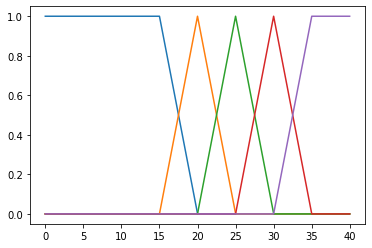

In [7]:
#Visualization of membership functions
plt.plot(temp,temp_vl,temp,temp_l,temp,temp_n,temp,temp_h,temp,temp_vh)

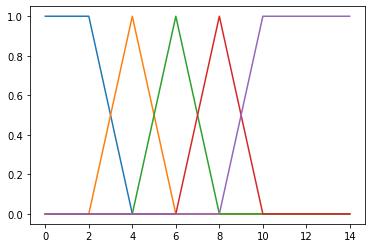

In [8]:
plt.plot(wind,wind_vl,wind,wind_l,wind,wind_n,wind,wind_h,wind,wind_vh)

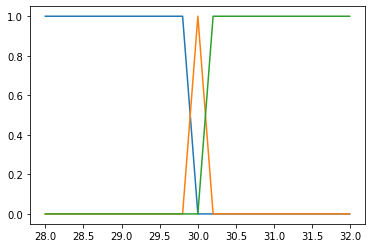

In [9]:
plt.plot(atm,atm_l,atm,atm_n,atm,atm_h)

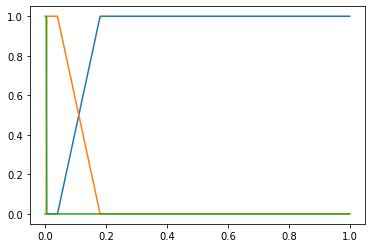

In [10]:
plt.plot(rate,rate_rc,rate,rate_sc,rate,rate_s)

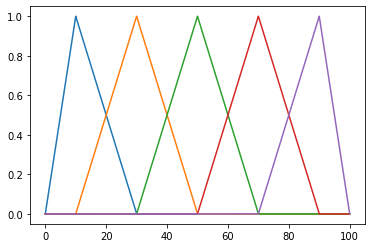

In [11]:
plt.plot(rain,rain_vl,rain,rain_l,rain,rain_n,rain,rain_h,rain,rain_vh)

In [12]:
def fuzzification(input_temp, input_wind, input_atm, input_rate):
  temp_is_vl=fuzz.interp_membership(temp,temp_vl,input_temp) #domain, membership function, value
  temp_is_l=fuzz.interp_membership(temp,temp_l,input_temp)
  temp_is_n=fuzz.interp_membership(temp,temp_n,input_temp)
  temp_is_h=fuzz.interp_membership(temp,temp_h,input_temp)
  temp_is_vh=fuzz.interp_membership(temp,temp_vh,input_temp)
  wind_is_vl=fuzz.interp_membership(wind,wind_vl,input_wind)
  wind_is_l=fuzz.interp_membership(wind,wind_l,input_wind)
  wind_is_n=fuzz.interp_membership(wind,wind_n,input_wind)
  wind_is_h=fuzz.interp_membership(wind,wind_h,input_wind)
  wind_is_vh=fuzz.interp_membership(wind,wind_vh,input_wind)
  atm_is_l=fuzz.interp_membership(atm,atm_l,input_atm)
  atm_is_n=fuzz.interp_membership(atm,atm_n,input_atm)
  atm_is_h=fuzz.interp_membership(atm,atm_h,input_atm)
  rate_is_s=fuzz.interp_membership(rate,rate_s,input_rate)
  rate_is_sc=fuzz.interp_membership(rate,rate_sc,input_rate)
  rate_is_rc=fuzz.interp_membership(rate,rate_rc,input_rate)
  temp_arr=[temp_is_vl,temp_is_l,temp_is_n,temp_is_h,temp_is_vh]
  wind_arr=[wind_is_vl,wind_is_l,wind_is_n,wind_is_h,wind_is_vh]
  atm_arr=[atm_is_l,atm_is_n,atm_is_h]
  rate_arr=[rate_is_s,rate_is_sc,rate_is_rc]
  return temp_arr,wind_arr,atm_arr,rate_arr

In [15]:
def inference_engine(temp_arr,wind_arr,atm_arr,rate_arr):
  temp_is_vl,temp_is_l,temp_is_n,temp_is_h,temp_is_vh=temp_arr
  wind_is_vl,wind_is_l,wind_is_n,wind_is_h,wind_is_vh=wind_arr
  atm_is_l,atm_is_n,atm_is_h=atm_arr
  rate_is_s,rate_is_sc,rate_is_rc=rate_arr

  #Calculate firing strength
  #If (temp is very low or low) and (wind is very low or low), rain is very low
  fire_rule1=min(max(temp_is_vl,temp_is_l),max(wind_is_vl,wind_is_l))
  #If rate is stable and atm is high, rain is very low
  fire_rule1=min(min(rate_is_s,atm_is_h),fire_rule1)
  r1_out=np.fmin(fire_rule1,rain_vl) #Get the membership degree of consequent
  #If ((temp is very low) and (wind is normal or high)) or ((temp is low) and (wind is normal)) or ((temp is normal) and (wind is very low or low)) or ((temp is high) and (wind is very low)), rain is low
  fire_rule2=max(min(temp_is_vl,max(wind_is_n,wind_is_h)),min(temp_is_l,wind_is_n),min(temp_is_n,max(wind_is_vl,wind_is_l)),min(temp_is_h,wind_is_vl))
  #If rate is stable and atm is normal or rate is slowly changing and atm is high, rain is low
  fire_rule2=min(max(min(rate_is_s,atm_is_n),min(rate_is_sc,atm_is_h)),fire_rule2)
  r2_out=np.fmin(fire_rule2,rain_l)
  #If ((temp is very high) and (wind is very low)) or ((temp is high or very high) and (wind is low)) or ((temp is normal or high) and (wind is normal)) or ((temp is low or normal) and (wind is high)) or ((temp is very low or low) and wind is (very high)),rain is normal
  fire_rule3=max(min(temp_is_vh,wind_is_vl),min(max(temp_is_h,temp_is_vh),wind_is_l),min(max(temp_is_n,temp_is_h),wind_is_n),min(max(temp_is_l,temp_is_n),wind_is_h),min(max(temp_is_vl,temp_is_l),wind_is_vh))
  #If rate is stable and atm is low or rate is slowly changing and atm is normal or rate is rapidly changing and atm is high, rain is normal
  fire_rule3=min(max(min(rate_is_s,atm_is_l),min(rate_is_sc,atm_is_n),min(rate_is_rc,atm_is_h)),fire_rule3)
  r3_out=np.fmin(fire_rule3,rain_n)
  #If ((temp is very high) and (wind is normal)) or ((temp is high or very high) and (wind is high)) or ((temp is normal or high) and (wind is very high)), rain is high
  fire_rule4=max(min(temp_is_vh,wind_is_n),min(max(temp_is_h,temp_is_vh),wind_is_h),min(max(temp_is_n,temp_is_h),wind_is_vh))
  #If rate is slowly changing and atm is low or rate is rapidly changing and atm is normal, rain is high
  fire_rule4=min(max(min(rate_is_sc,atm_is_l),min(rate_is_rc,atm_is_n)),fire_rule4)
  r4_out=np.fmin(fire_rule4,rain_h)
  #If (temp is very high) and (wind is very high), rain is very high
  fire_rule5=min(temp_is_vh,wind_is_vh)
  #If rate is rapidly changing and atm is low, rain is very high
  fire_rule5=min(min(rate_is_rc,atm_is_l),fire_rule5)
  r5_out=np.fmin(fire_rule5,rain_vh)
  
  #Aggregate the rules
  fuzz_out=np.fmax(r1_out,r2_out) 
  fuzz_out=np.fmax(fuzz_out,r3_out) 
  fuzz_out=np.fmax(fuzz_out,r4_out) 
  fuzz_out=np.fmax(fuzz_out,r5_out) 
  return fuzz_out

In [14]:
def defuzzification(fuzz_out):
  return fuzz.defuzz(rain,fuzz_out,"centroid") #centroid,bisector,mom,som,lom

In [18]:
def main():
  print("Please input temperature:")
  input_temp=float(input())
  print("Please input wind speed:")
  input_wind=float(input())
  print("Please input atmospheric pressure:")
  input_atm=float(input())
  print("Please input decrease in atmospheric pressure in the last 3 hours:")
  input_rate=float(input())
  temp_arr,wind_arr,atm_arr,rate_arr=fuzzification(input_temp, input_wind, input_atm, input_rate)
  fuzz_out=inference_engine(temp_arr,wind_arr,atm_arr,rate_arr)
  print("Rain output: {:.2f}/100".format(defuzzification(fuzz_out)))
main()

Please input temperature:
22
Please input wind speed:
7
Please input atmospheric pressure:
30.1
Please input decrease in atmospheric pressure in the last 3 hours:
0.05
Rain output: 40.00 out of 100
